In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Use pandas to load the dataset and examine the first few rows.

df = pd.read_csv('/content/ex2data1.txt')
df.columns = ["Exam 1", "Exam 2", "Admission"]

df.head()


,Exam 1,Exam 2,Admission
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


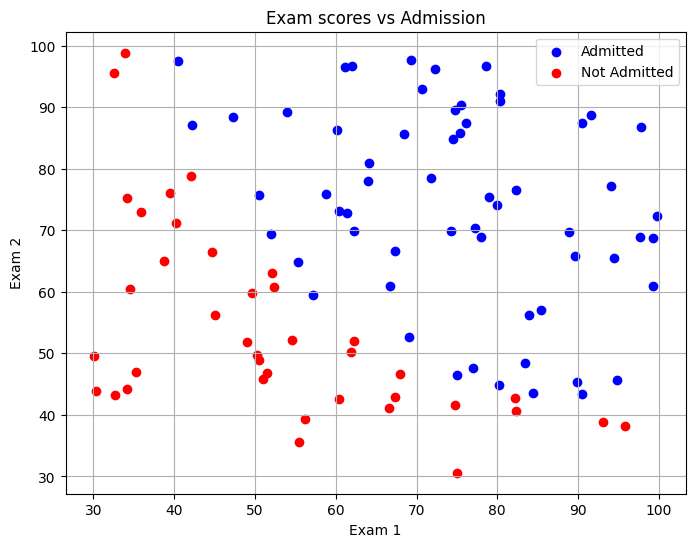

"\nAnother way would be to use sns\nsns.scatterplot(df, x = 'Exam 1', y = 'Exam 2', hue = 'Admission')\n"

In [4]:
# Create a scatter plot to visualize the data points for students who were admitted versus those who were not based on their exam scores.

# we can devide the students into 2 groups - those who were admitted and those who weren't.
admitted = df[df['Admission'] == 1]
not_admitted = df[df['Admission'] == 0]

# create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(admitted['Exam 1'], admitted['Exam 2'], color='blue', label='Admitted')
plt.scatter(not_admitted['Exam 1'], not_admitted['Exam 2'], color='red', label='Not Admitted')

# plot
plt.title('Exam scores vs Admission')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.legend()
plt.grid(True)
plt.show()

'''
Another way would be to use sns
sns.scatterplot(df, x = 'Exam 1', y = 'Exam 2', hue = 'Admission')
'''


In [5]:
# Implement logistic regression using the LogisticRegression function from scikit-learn to find the best parameters for your model.
# Train the logistic regression model on your dataset.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=['Admission'])  # all features except the target column
y = df['Admission']  # target column (boolean yes/no for Admission)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [6]:
# Use the trained logistic regression model to make predictions on your dataset.
# Calculate the accuracy of your model.

from sklearn.metrics import accuracy_score

# make predictions on the test data
y_pred = model.predict(X_test)

# check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.93


Classification report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.88      1.00      0.94        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


Confusion matrix:
[[13  2]
 [ 0 15]]


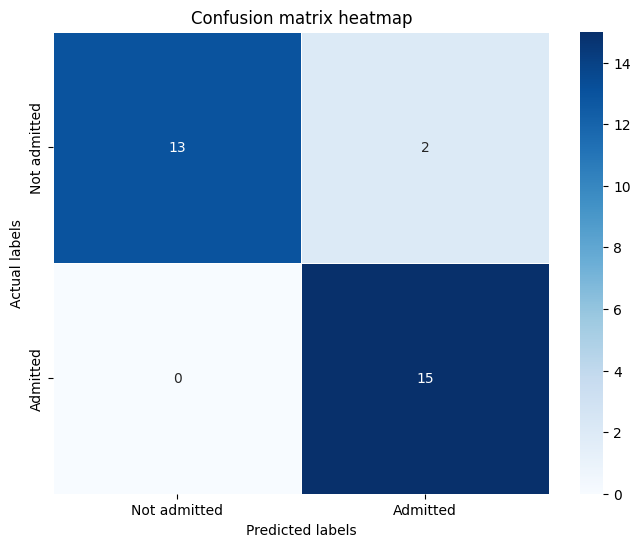

'\nWe have 93% accuracy !\nThis is very good.\n\n[[13  2]\n [ 0 15]]\n\n We have 100% recall - because the FN is 0.\n And we have only 2 FP, meaning that only 2 students were admitted by mistake.\n \n '

In [7]:
# Model Evaluation - Interpret the result of logistic regression and the accuracy of your model.

from sklearn.metrics import classification_report, confusion_matrix

print("Classification report:")
print(classification_report(y_test, y_pred))

# generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("\nConfusion matrix:")
print(cm)

# define class names
class_names = ["Not admitted", "Admitted"]

# create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title("Confusion matrix heatmap")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

'''
We have 93% accuracy !
This is very good.

[[13  2]
 [ 0 15]]

 We have 100% recall - because the FN is 0.
 And we have only 2 FP, meaning that only 2 students were admitted by mistake.

 '''
